We reccomend you calculate the Energy Use Intensity (kBtu/GSF) before training your model. Since the various energy uses are in different units you must first convert them to kBtu, then sum them up to get the total anunal energy use, and lastly divide by the building gross square footage. You will find some starter code in this notebook to calculate the WUI.

$$eui = \dfrac{annual\,energy\, use\,(kBtu)}{building\,square\,footage\,(GSF)}, \, where\, annual\,energy\,use = electricity(kBtu) + gas(kBtu) + oil(kBtu)$$

In [3]:
def kWh_to_kBTu(electricity):
    "Converts kilowatt-hours(kWh) to kilobtus(kBtu)"
    return electricity*3.4121


# example use case
# df['E'] = df['E'].apply(kWh_to_kBTu)

In [4]:
def therms_to_kBTu(gas):
    "Converts therms(thm) to kilobtus(kBtu)"
    return gas*99.976

# example use case
# df['G'] = df['G'].apply(therms_to_kBTu)

In [9]:
def gallons_to_kBTu(oil):
    "Converts gallons to kilobtus(kBtu)"
    return oil*139

# example use case
# df['O'] = df['O'].apply(gallons_to_kBTu) 

In [10]:
def eui(E, G, O, GSF): 
    """
    Calculates energy use intensity given energy uses and building gross square footage. 
    : param E - electricity use in kBtu
    : param G - gas use in kBtu
    : param O - natural oil use in kBtu
    : param GSF - building gross square footage
    """
    annual_energy_use = E + G + O
    return annual_energy_use/GSF
    
# example use case
# df['eui'] = df.apply(lambda: eui(df['E'], df['G'], df['O'], df['GSF']))

In [54]:
import pandas as pd

# read the building data from a CSV file
research_df = pd.read_csv('./data/research.csv')


#converting the lectricity, oil and gas to kBTu
research_df['E_kBTu'] = research_df['E'].apply(kWh_to_kBTu)
research_df['G_kBTu'] = research_df['G'].apply(therms_to_kBTu)
research_df['O_kBTu'] = research_df['O'].apply(gallons_to_kBTu)

research_df.head(5)

,Building Code,Address,Property Type,E,G,O,Building Gross Footage,E_kBTu,G_kBTu,O_kBTu
0,581,2 Cummington Mall,Research,1486320,42183,0.0,59825.75,5.071472e+06,4.217288e+06,0.0
1,582,30-38 Cummington Street,Research,1309308,43468,5531.0,36466.44,4.467490e+06,4.345757e+06,768809.0
2,587,42-44 Cummington Street,Research,3800070,106247,0.0,101335.67,1.296622e+07,1.062215e+07,0.0
3,595,3-5 Cummington Street (616-620 Comm. Ave.),Research,3957840,139459,0.0,152457.33,1.350455e+07,1.394255e+07,0.0
4,597,631-639 Commonwealth Avenue,Research,1588680,39331,190.4,100339.72,5.420735e+06,3.932156e+06,26465.6


In [56]:
# research_df['eui'] = [eui(research_df.iloc[i]['E_kBTu'],
# research_df.iloc[i]['G_kBTu'],
# research_df.iloc[i]['O_kBTu'],
# research_df.iloc[i]['Building Gross Footage']) for i in range(len(research_df))]

research_df['eui'] = research_df.apply(lambda x : eui(x['E_kBTu'], x['G_kBTu'], x['O_kBTu'], x['Building Gross Footage']),axis=1)


In [102]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


Text(0.5, 1.0, 'O vs Building Gross Footage')

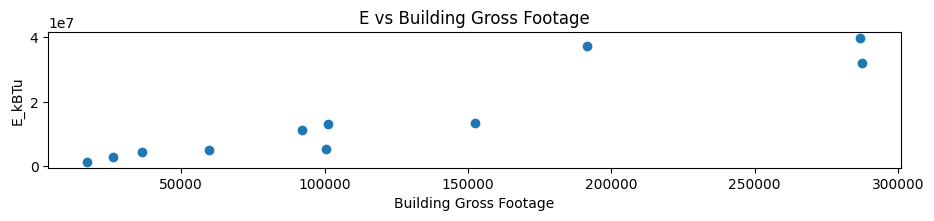

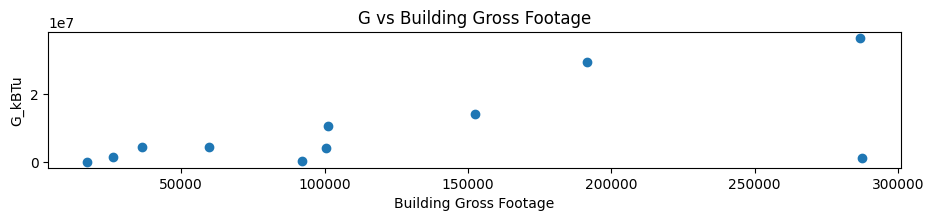

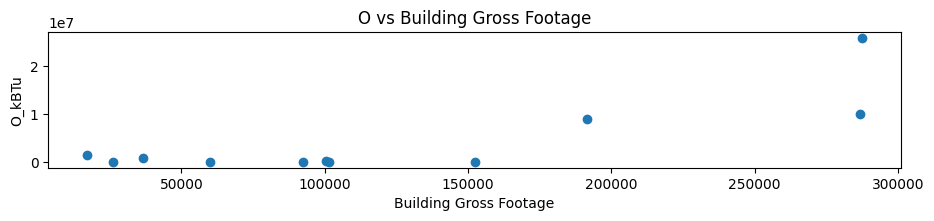

In [107]:

import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
plt.subplot(3,1,1)
plt1=plt.scatter(research_df['Building Gross Footage'],research_df['E_kBTu'])
plt.ylabel("E_kBTu")
plt.xlabel('Building Gross Footage')
plt.title("E vs Building Gross Footage")

plt.figure(figsize=(11,6))
plt.subplot(3,1,2)
plt1=plt.scatter(research_df['Building Gross Footage'],research_df['G_kBTu'])
plt.ylabel("G_kBTu")
plt.xlabel('Building Gross Footage')
plt.title("G vs Building Gross Footage")

plt.figure(figsize=(11,6))
plt.subplot(3,1,3)
plt1=plt.scatter(research_df['Building Gross Footage'],research_df['O_kBTu'])
plt.ylabel("O_kBTu")
plt.xlabel('Building Gross Footage')
plt.title("O vs Building Gross Footage")

In [149]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
X = research_df['Building Gross Footage']
y_o = research_df['O_kBTu']
X = np.array(X)
y_o = np.array(y_o)
# create a linear regression model and fit it to the training dataset
model = LinearRegression()
# model.fit(X.reshape(-1,1), y_o.reshape(-1,1))

# # estimate the energy usage for a new building with 100,000 square feet
# new_building_square_footage = 400268
# predicted_energy_usage = model.predict([[new_building_square_footage]])
# predicted_energy_usage

from sklearn.model_selection import train_test_split
X = X.reshape(-1,1)
y = y_o.reshape(-1,1)
trainX, testX, trainY, testY = train_test_split(X,y,  test_size= 0.2)
model.fit(trainX, trainY)
print("For oil, train set model score : ", model.score(trainX, trainY))
print("For oil, test set model score : ",model.score(testX,testY))
# model.predict(X)

For oil, train set model score :  0.663426294332272
For oil, test set model score :  -0.11172573507299433


In [150]:
X = research_df['Building Gross Footage']
y_e = research_df['E_kBTu']
X = np.array(X)
y_e = np.array(y_e)
# create a linear regression model and fit it to the training dataset
model = LinearRegression()
from sklearn.model_selection import train_test_split
X = X.reshape(-1,1)
y = y_e.reshape(-1,1)
trainX, testX, trainY, testY = train_test_split(X,y,  test_size= 0.2)
model.fit(trainX, trainY)
print("For electricity, train set model score : ", model.score(trainX, trainY))
print("For electricity, test set model score : ",model.score(testX,testY))
# model.predict(X)

For electricity, train set model score :  0.8963587360848546
For electricity, test set model score :  0.5585812406615931


In [151]:
X = research_df['Building Gross Footage']
y_g = research_df['G_kBTu']
X = np.array(X)
y_g = np.array(y_g)
# create a linear regression model and fit it to the training dataset
model = LinearRegression()

from sklearn.model_selection import train_test_split
X = X.reshape(-1,1)
y = y_g.reshape(-1,1)
trainX, testX, trainY, testY = train_test_split(X,y,  test_size= 0.2)
model.fit(trainX, trainY)
print("For gas, train set model score : ", model.score(trainX, trainY))
print("For gas, test set model score : ",model.score(testX,testY))
# model.predict(X)

For gas, train set model score :  0.38275414391467577
For gas, test set model score :  0.4042958766707624


In [152]:
X = research_df['Building Gross Footage']
y_eui = research_df['eui']
X = np.array(X)
y_eui = np.array(y_eui)
# create a linear regression model and fit it to the training dataset
model = LinearRegression()

from sklearn.model_selection import train_test_split
X = X.reshape(-1,1)
y = y_eui.reshape(-1,1)
trainX, testX, trainY, testY = train_test_split(X,y,  test_size= 0.2)
model.fit(trainX, trainY)
print("For EUI, train set model score : ", model.score(trainX, trainY))
print("For EUI, test set model score : ",model.score(testX,testY))
# model.predict(X)

For EUI, train set model score :  0.08715022203803646
For EUI, test set model score :  0.778129344899917


In [115]:
# read the building data from a CSV file
residential_df = pd.read_csv('./data/residential.csv')
residential_df.count()


Building Code             161
Address                   147
Property Type             161
E (kWh)                   161
G(therms)                 161
O(gallon)                 161
Building Gross Footage    147
dtype: int64

In [116]:

residential_df.dropna(inplace=True)

In [123]:
x = residential_df.iloc[-2]
eui(x['E_kBTu'], x['G_kBTu'], x['O_kBTu'], x['Building Gross Footage'])

11.94341331459017

In [133]:
#converting the lectricity, oil and gas to kBTu
residential_df['E_kBTu'] = residential_df['E (kWh)'].apply(kWh_to_kBTu)
residential_df['G_kBTu'] = residential_df['G(therms)'].apply(therms_to_kBTu)
residential_df['O_kBTu'] = residential_df['O(gallon)'].apply(gallons_to_kBTu)
residential_df['eui'] = residential_df.apply(lambda x : eui(x['E_kBTu'], 0, x['O_kBTu'], x['Building Gross Footage']),axis=1)

residential_df


,Building Code,Address,Property Type,E (kWh),G(therms),O(gallon),Building Gross Footage,E_kBTu,G_kBTu,O_kBTu,eui
0,500,10 Buick Street,Residential,13205241.58,1658548,253894.7,384941.16,4.505760e+07,1.658150e+08,35291363.3,208.730519
1,506,112 BAY STATE ROAD,Residential,15476.00,852,2571.7,4961.74,5.280566e+04,8.517955e+04,357466.3,82.687114
2,508,183 BAY STATE ROAD,Residential,21382.00,7269,0.0,8621.75,7.295752e+04,7.267255e+05,0.0,8.462032
3,509,610 BEACON STREET,Residential,1201216.00,4408,99773.0,203525.46,4.098669e+06,4.406942e+05,13868447.0,88.279452
4,510,68-70 BAY STATE ROAD,Residential,18803.00,0,0.0,11906.90,6.415772e+04,0.000000e+00,0.0,5.388280
...,...,...,...,...,...,...,...,...,...,...,...
155,843,25 ABERDEEN STREET,Residential,12368.58,6671,0.0,7113.74,4.220283e+04,6.669399e+05,0.0,5.932580
156,845,27 ABERDEEN STREET,Residential,29920.67,9305,0.0,8248.13,1.020923e+05,9.302767e+05,0.0,12.377632
158,848,853 BEACON STREET,Residential,10286.17,0,3928.2,6477.41,3.509744e+04,0.000000e+00,546019.8,89.714445
159,849,875 BEACON STREET,Residential,4897.00,647,0.0,6814.93,1.670905e+04,6.468447e+04,0.0,2.451831


In [134]:
residential_df.isna().any()

Building Code             False
Address                   False
Property Type             False
E (kWh)                   False
G(therms)                 False
O(gallon)                 False
Building Gross Footage    False
E_kBTu                    False
G_kBTu                    False
O_kBTu                    False
eui                       False
dtype: bool

Text(0.5, 1.0, 'O vs Building Gross Footage')

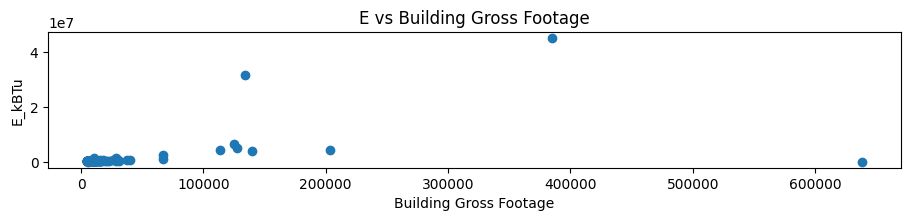

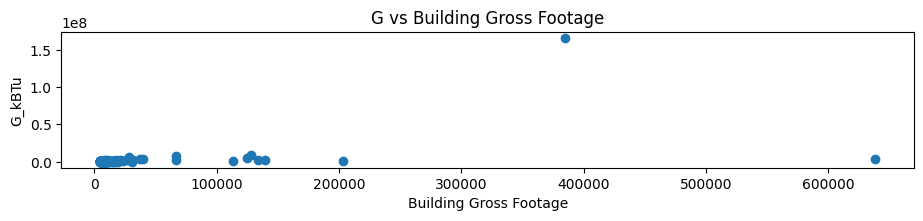

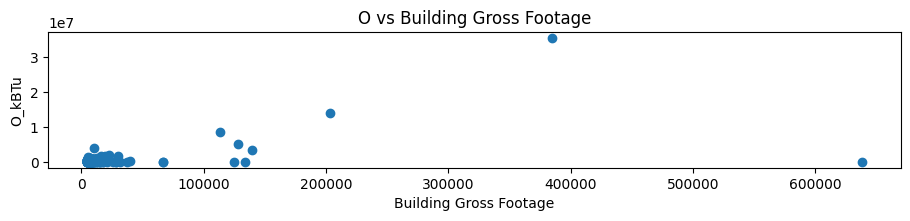

In [135]:

import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
plt.subplot(3,1,1)
plt1=plt.scatter(residential_df['Building Gross Footage'],residential_df['E_kBTu'])
plt.ylabel("E_kBTu")
plt.xlabel('Building Gross Footage')
plt.title("E vs Building Gross Footage")

plt.figure(figsize=(11,6))
plt.subplot(3,1,2)
plt1=plt.scatter(residential_df['Building Gross Footage'],residential_df['G_kBTu'])
plt.ylabel("G_kBTu")
plt.xlabel('Building Gross Footage')
plt.title("G vs Building Gross Footage")

plt.figure(figsize=(11,6))
plt.subplot(3,1,3)
plt1=plt.scatter(residential_df['Building Gross Footage'],residential_df['O_kBTu'])
plt.ylabel("O_kBTu")
plt.xlabel('Building Gross Footage')
plt.title("O vs Building Gross Footage")

In [147]:
X = residential_df['Building Gross Footage']
y_eui = residential_df['eui']
X = np.array(X)
y_eui = np.array(y_eui)
# create a linear regression model and fit it to the training dataset
model = LinearRegression()


from sklearn.model_selection import train_test_split
X = X.reshape(-1,1)
y = y_eui.reshape(-1,1)
trainX, testX, trainY, testY = train_test_split(X,y,  test_size= 0.2)
model.fit(trainX, trainY)
print("For EUI, train set model score : ", model.score(trainX, trainY))
print("For EUI, test set model score : ",model.score(testX,testY))
# model.predict(X)

For EUI, train set model score :  0.008508464205581379
For EUI, test set model score :  -0.04613771512469156


In [155]:
X = residential_df['Building Gross Footage']
y_g = residential_df['G_kBTu']
X = np.array(X)
y_g = np.array(y_g)
# create a linear regression model and fit it to the training dataset
model = LinearRegression()

from sklearn.model_selection import train_test_split
X = X.reshape(-1,1)
y = y_g.reshape(-1,1)
trainX, testX, trainY, testY = train_test_split(X,y,  test_size= 0.2)
model.fit(trainX, trainY)
print("For gas, train set model score : ", model.score(trainX, trainY))
print("For gas, test set model score : ",model.score(testX,testY))
# model.predict(X)

For gas, train set model score :  0.23736825744475876
For gas, test set model score :  0.8775621156314627


In [131]:
X = research_df['Building Gross Footage']
y_e = research_df['E_kBTu']
X = np.array(X)
y_e = np.array(y_e)
# create a linear regression model and fit it to the training dataset
model = LinearRegression()
model.fit(X.reshape(-1,1), y_e.reshape(-1,1))

# estimate the energy usage for a new building with 100,000 square feet
new_building_square_footage = 400268
predicted_energy_usage = model.predict([[new_building_square_footage]])
predicted_energy_usage

from sklearn.model_selection import train_test_split
X = X.reshape(-1,1)
y = y_e.reshape(-1,1)
trainX, testX, trainY, testY = train_test_split(X,y,  test_size= 0.2)
model.fit(trainX, trainY)
print("For electricity, train set model score : ", model.score(trainX, trainY))
print("For electricity, test set model score : ",model.score(testX,testY))
# model.predict(X)

For electricity, train set model score :  0.9404853235127256
For electricity, test set model score :  0.6110355592923586


In [156]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
X = residential_df['Building Gross Footage']
y_o = residential_df['O_kBTu']
X = np.array(X)
y_o = np.array(y_o)
# create a linear regression model and fit it to the training dataset
model = LinearRegression()

from sklearn.model_selection import train_test_split
X = X.reshape(-1,1)
y = y_o.reshape(-1,1)
trainX, testX, trainY, testY = train_test_split(X,y,  test_size= 0.2)
model.fit(trainX, trainY)
print("For oil, train set model score : ", model.score(trainX, trainY))
print("For oil, test set model score : ",model.score(testX,testY))
# model.predict(X)

For oil, train set model score :  0.7323573365707077
For oil, test set model score :  -6.8132119650533145
